In [62]:
from sklearn import tree  ,preprocessing
import pandas as pd 

f =pd.read_csv('titanic_train.csv')
f.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [63]:
titanic=f.copy(deep=True)

In [104]:
def precess_method(f_name):
    f_name["Age"] = f_name["Age"].fillna(f_name["Age"].median())
    f_name["Fare"] = f_name["Fare"].fillna(f_name["Fare"].median())
    
    f_name.loc[f_name["Sex"] == "male", "Sex"] = 0
    f_name.loc[f_name["Sex"] == "female", "Sex"] = 1
    
    f_name.loc[f_name["Age"]<=18, "Age"] = 0
    f_name.loc[f_name["Age"]>18, "Age"] = 1
    
    f_name.loc[f_name['Fare']<=31,'Fare' ]=0 
    f_name.loc[f_name['Fare']>31,'Fare']=1

In [64]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())
titanic["Fare"] = titanic["Fare"].fillna(titanic["Fare"].median())

In [65]:
titanic.loc[titanic["Sex"] == "male", "Sex"] = 0
titanic.loc[titanic["Sex"] == "female", "Sex"] = 1
print(titanic['Sex'].unique())

[0 1]


In [66]:
titanic["Age"].unique()
titanic.loc[titanic["Age"]<=18, "Age"] = 0
titanic.loc[titanic["Age"]>18, "Age"] = 1
titanic["Age"].unique()
# a=titanic["Age"] 
# a[a<=18]=0
# a[a>18]=1
# titanic["Age"] =a 
# titanic["Age"]
# a.unique()


array([1., 0.])

In [70]:
titanic.loc[titanic['Fare']<=31,'Fare' ]=0 
titanic.loc[titanic['Fare']>31,'Fare']=1
titanic['Fare'].unique()

array([0., 1.])

In [71]:
titanic['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [100]:
clf=tree.DecisionTreeClassifier(max_depth = 5)
predictors = ["Pclass", "Sex", "Age", "Fare", ]
clf.fit(titanic[predictors],titanic['Survived'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [101]:

#把决策树保存到pdf
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("tree.pdf")


True

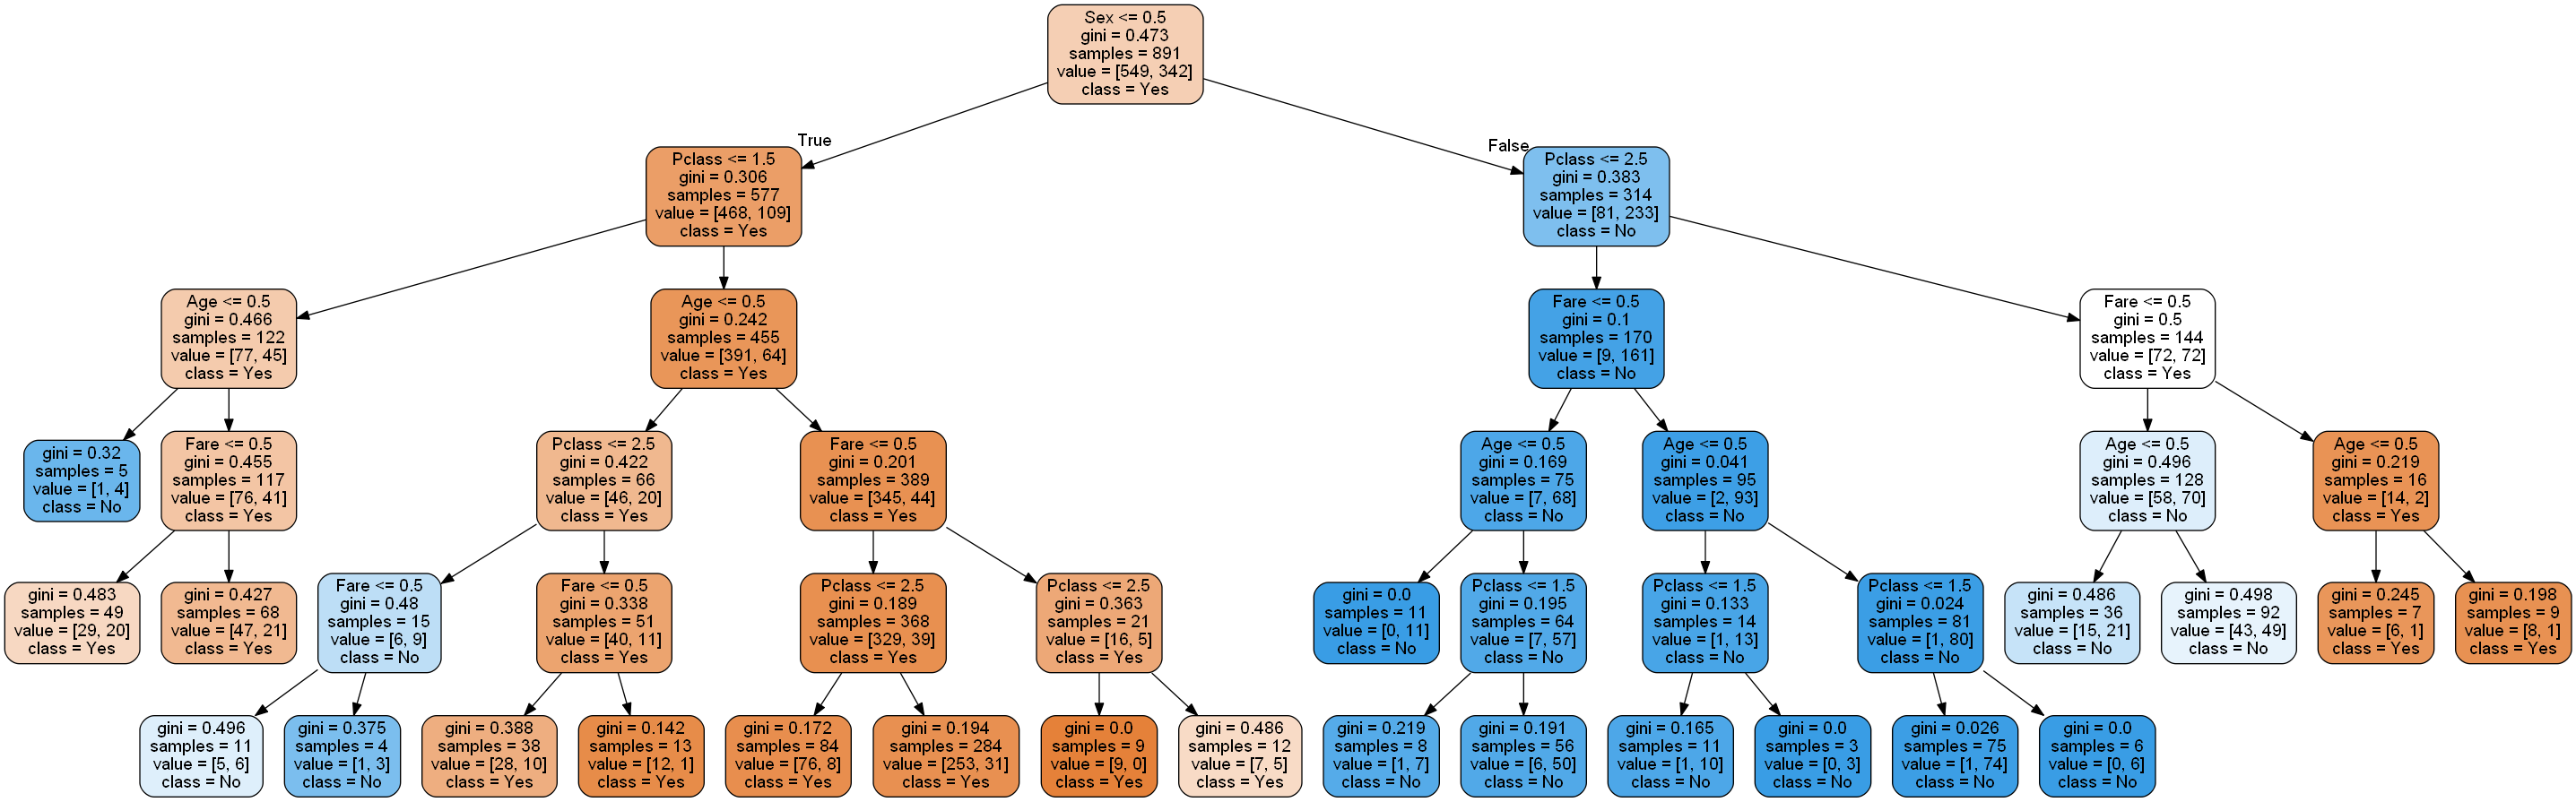

In [102]:
#可视化DTs
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=predictors,  
                     class_names=['Yes','No'],  
                     filled=True, rounded=True,  
                     special_characters=False)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [107]:
test=pd.read_csv('test.csv')
precess_method(test)
pred_r=clf.predict(test[predictors])

In [114]:
id=test['PassengerId']
id_f=pd.DataFrame(data=id)
iy_f=pd.DataFrame(data=pred_r)
pd.concat([id_f,iy_f],axis=1).to_csv(path_or_buf="2019-7-4tree001.csv",
                          header=['PassengerId','Survived'],index=False)